In [1]:
import numpy as np
import pandas as pd

In [2]:
input_size=2 #features 
layers=[4,3] #no. of neurons in 1st and 2nd layer
output_size=2

In [109]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}  #dictionary
        
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        
        
    def forward(self,x):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        
        return y_
    
   
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        m=x.shape[0]

        a1,a2,y_=self.activation_outputs
        
        delta3=y_- y
        
        
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        #update the modell parameters using gradient descent
        
        self.model['W1'] -=learning_rate*dw1
        self.model['b1'] -=learning_rate*db1
        
        
        self.model['W2'] -=learning_rate*dw2
        self.model['b2'] -=learning_rate*db2
        
        
        self.model['W3'] -=learning_rate*dw3
        self.model['b3'] -=learning_rate*db3
        
        
    def predict(self,x):
        
        y_out=self.forward(x)
        
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        
        W1,W2,W3= self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_ouputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        
        print("W3",W3.shape)
        print("A3",y_.shape)
        
    

In [110]:
def softmax(a):
    e_pa=np.exp(a)
    
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    
    return ans

In [111]:
a=np.array([[10,10]])
a_=softmax(a)
print(a_)

[[0.5 0.5]]


In [112]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    
    return l

In [113]:
def one_hot(y,depth):
    
    m=y.shape[0]  #rows of matrix= no. of examples
    y_oht=np.zeros((m,depth))
    
    y_oht[np.arange(m),y]=1
    
    return y_oht
    

In [114]:
###Generating Data

from sklearn.datasets import make_circles

import matplotlib.pyplot as plt

In [115]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

In [116]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


<function matplotlib.pyplot.show(*args, **kw)>

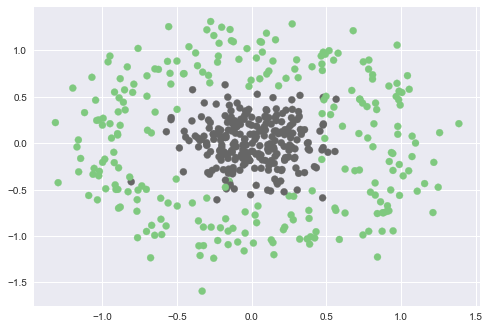

In [117]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show

In [119]:
#Training our model

model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)


In [120]:
model.forward(X)

array([[0.52335135, 0.47664865],
       [0.53144257, 0.46855743],
       [0.57726974, 0.42273026],
       [0.28383524, 0.71616476],
       [0.63877346, 0.36122654],
       [0.50841174, 0.49158826],
       [0.37442957, 0.62557043],
       [0.55888858, 0.44111142],
       [0.5711453 , 0.4288547 ],
       [0.3442594 , 0.6557406 ],
       [0.49498476, 0.50501524],
       [0.4336066 , 0.5663934 ],
       [0.36449759, 0.63550241],
       [0.37609645, 0.62390355],
       [0.51318589, 0.48681411],
       [0.40138333, 0.59861667],
       [0.4729603 , 0.5270397 ],
       [0.6071061 , 0.3928939 ],
       [0.45184873, 0.54815127],
       [0.43976498, 0.56023502],
       [0.48953223, 0.51046777],
       [0.55503744, 0.44496256],
       [0.58933294, 0.41066706],
       [0.64427947, 0.35572053],
       [0.45240396, 0.54759604],
       [0.56502192, 0.43497808],
       [0.5600346 , 0.4399654 ],
       [0.47502227, 0.52497773],
       [0.41733084, 0.58266916],
       [0.70560946, 0.29439054],
       [0.

In [121]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [132]:
losses = train(X,Y,model,500,0.001)


Epoch 0 Loss 0.0358
Epoch 1 Loss 0.0358
Epoch 2 Loss 0.0358
Epoch 3 Loss 0.0358
Epoch 4 Loss 0.0358
Epoch 5 Loss 0.0358
Epoch 6 Loss 0.0358
Epoch 7 Loss 0.0358
Epoch 8 Loss 0.0358
Epoch 9 Loss 0.0358
Epoch 10 Loss 0.0358
Epoch 11 Loss 0.0358
Epoch 12 Loss 0.0358
Epoch 13 Loss 0.0358
Epoch 14 Loss 0.0358
Epoch 15 Loss 0.0358
Epoch 16 Loss 0.0358
Epoch 17 Loss 0.0358
Epoch 18 Loss 0.0357
Epoch 19 Loss 0.0357
Epoch 20 Loss 0.0357
Epoch 21 Loss 0.0357
Epoch 22 Loss 0.0357
Epoch 23 Loss 0.0357
Epoch 24 Loss 0.0357
Epoch 25 Loss 0.0357
Epoch 26 Loss 0.0357
Epoch 27 Loss 0.0357
Epoch 28 Loss 0.0357
Epoch 29 Loss 0.0357
Epoch 30 Loss 0.0357
Epoch 31 Loss 0.0357
Epoch 32 Loss 0.0357
Epoch 33 Loss 0.0357
Epoch 34 Loss 0.0357
Epoch 35 Loss 0.0357
Epoch 36 Loss 0.0357
Epoch 37 Loss 0.0357
Epoch 38 Loss 0.0357
Epoch 39 Loss 0.0357
Epoch 40 Loss 0.0357
Epoch 41 Loss 0.0357
Epoch 42 Loss 0.0357
Epoch 43 Loss 0.0357
Epoch 44 Loss 0.0357
Epoch 45 Loss 0.0357
Epoch 46 Loss 0.0357
Epoch 47 Loss 0.0357
Ep

Epoch 442 Loss 0.0353
Epoch 443 Loss 0.0353
Epoch 444 Loss 0.0353
Epoch 445 Loss 0.0353
Epoch 446 Loss 0.0353
Epoch 447 Loss 0.0353
Epoch 448 Loss 0.0353
Epoch 449 Loss 0.0353
Epoch 450 Loss 0.0353
Epoch 451 Loss 0.0353
Epoch 452 Loss 0.0353
Epoch 453 Loss 0.0353
Epoch 454 Loss 0.0353
Epoch 455 Loss 0.0353
Epoch 456 Loss 0.0353
Epoch 457 Loss 0.0353
Epoch 458 Loss 0.0353
Epoch 459 Loss 0.0353
Epoch 460 Loss 0.0353
Epoch 461 Loss 0.0353
Epoch 462 Loss 0.0353
Epoch 463 Loss 0.0353
Epoch 464 Loss 0.0353
Epoch 465 Loss 0.0353
Epoch 466 Loss 0.0353
Epoch 467 Loss 0.0353
Epoch 468 Loss 0.0353
Epoch 469 Loss 0.0353
Epoch 470 Loss 0.0353
Epoch 471 Loss 0.0353
Epoch 472 Loss 0.0353
Epoch 473 Loss 0.0353
Epoch 474 Loss 0.0353
Epoch 475 Loss 0.0353
Epoch 476 Loss 0.0353
Epoch 477 Loss 0.0353
Epoch 478 Loss 0.0353
Epoch 479 Loss 0.0353
Epoch 480 Loss 0.0353
Epoch 481 Loss 0.0353
Epoch 482 Loss 0.0353
Epoch 483 Loss 0.0353
Epoch 484 Loss 0.0353
Epoch 485 Loss 0.0353
Epoch 486 Loss 0.0353
Epoch 487 

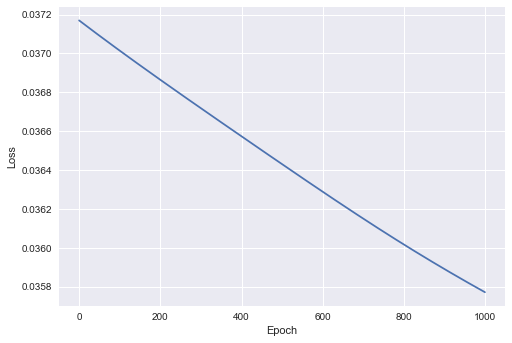

In [131]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [133]:
#Visualize

In [134]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

ModuleNotFoundError: No module named 'visualize'

In [135]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))


Training Accuracy 97.4000


In [136]:
datasets = ["xor","classification","moons","circles"]

id = 1
plt.figure(figsize=(15,15))
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,logs=False)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    no = 220+id
    
    plt.subplot(no)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    id +=1

plt.show()

NameError: name 'load_dataset' is not defined

<Figure size 1080x1080 with 0 Axes>